#  Heart rhythm classification from raw ECG signals

In [29]:
import pandas as pd
import numpy as np
import neurokit2 as nk
import biosppy.signals.ecg as ecg
import seaborn as sns
import matplotlib.pyplot as plt
sns.set('talk')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

## Params

In [20]:
sr = 300 #sampling rate
# Some matplotlib setting 

plt.rcParams['figure.figsize'] = (30, 20)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 32
#plt.rcParams['axes.labelsize'] = 48
#plt.rcParams['axes.titlesize'] = 48

## Read data

In [3]:
path = './'

In [4]:
df_train = pd.read_csv(path+'X_train.csv')

In [5]:
df_test = pd.read_csv(path+'X_test.csv')

In [6]:
df_target = pd.read_csv(path+'y_train.csv')

In [7]:
df_train.head()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,...,x17592,x17593,x17594,x17595,x17596,x17597,x17598,x17599,x17600,x17601,x17602,x17603,x17604,x17605,x17606,x17607,x17608,x17609,x17610,x17611,x17612,x17613,x17614,x17615,x17616,x17617,x17618,x17619,x17620,x17621,x17622,x17623,x17624,x17625,x17626,x17627,x17628,x17629,x17630,x17631,x17632,x17633,x17634,x17635,x17636,x17637,x17638,x17639,x17640,x17641,x17642,x17643,x17644,x17645,x17646,x17647,x17648,x17649,x17650,x17651,x17652,x17653,x17654,x17655,x17656,x17657,x17658,x17659,x17660,x17661,x17662,x17663,x17664,x17665,x17666,x17667,x17668,x17669,x17670,x17671,x17672,x17673,x17674,x17675,x17676,x17677,x17678,x17679,x17680,x17681,x17682,x17683,x17684,x17685,x17686,x17687,x17688,x17689,x17690,x17691,x17692,x17693,x17694,x17695,x17696,x17697,x17698,x17699,x17700,x17701,x17702,x17703,x17704,x17705,x17706,x17707,x17708,x17709,x17710,x17711,x17712,x17713,x17714,x17715,x17716,x17717,x17718,x17719,x17720,x17721,x17722,x17723,x17724,x17725,x17726,x17727,x17728,x17729,x17730,x17731,x17732,x17733,x17734,x17735,x17736,x17737,x17738,x17739,x17740,x17741,x17742,x17743,x17744,x17745,x17746,x17747,x17748,x17749,x17750,x17751,x17752,x17753,x17754,x17755,x17756,x17757,x17758,x17759,x17760,x17761,x17762,x17763,x17764,x17765,x17766,x17767,x17768,x17769,x17770,x17771,x17772,x17773,x17774,x17775,x17776,x17777,x17778,x17779,x17780,x17781,x17782,x17783,x17784,x17785,x17786,x17787,x17788,x17789,x17790,x17791,x17792,x17793,x17794,x17795,x17796,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806,x17807,x17808,x17809,x17810,x17811,x17812,x17813,x17814,x17815,x17816,x17817,x17818,x17819,x17820,x17821,x17822,x17823,x17824,x17825,x17826,x17827,x17828,x17829,x17830,x17831,x17832,x17833,x17834,x17835,x17836,x17837,x17838,x17839,x17840,x17841
0,0,-64,-66,-69,-72,-75,-77,-80,-86,-89,-83,-70,-51,-21,34,112,227,360,450,481,452,362,228,108,25,-1,-8,-12,-14,-17,-21,-28,-35,-42,-50,-57,-67,-76,-80,-81,-82,-82,-82,-82,-82,-83,-84,-84,-83,-79,-74,-70,-66,-62,-59,-55,-51,-47,-43,-41,-39,-37,-36,-34,-33,-32,-30,-29,-26,-23,-20,-16,-13,-9,-6,-4,0,2,6,12,23,35,48,59,68,76,85,94,102,109,115,122,129,135,142,150,162,180,192,204,215,225,233,239,242,242,235,225,208,187,168,147,125,98,73,54,39,27,19,11,3,-3,-7,-9,-12,-14,-17,-19,-22,-24,-26,-28,-30,-32,-34,-35,-36,-39,-45,-51,-51,-46,-39,-30,-20,-16,-14,-14,-13,-12,-11,-10,-9,-9,-8,-7,-6,-5,-4,-3,-2,0,3,12,29,52,88,135,189,243,296,334,348,353,349,340,331,322,312,300,266,203,138,88,51,13,-3,-10,-13,-16,-17,-18,-17,-15,-11,-6,-1,5,15,22,28,33,37,40,41,37,29,20,13,6,0,-4,-7,-6,-3,2,9,22,45,68,93,121,149,174,189,192,193,195,196,196,196,195,192,187,181,170,149,129,106,77,51,14,-27,-49,-63,-72,-80,-88,-97,-105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
## Get one sample per class, taken from biosppy_examples.ipynb
labels_array = df_target['y'].to_numpy()
num_classes = 4
sample_signal_ids = []
for class_id in range(num_classes):
    sample_signal_ids.append(int(np.argwhere(labels_array == class_id)[0]))
    
# Print indices of the sample signals
sample_signal_ids

[0, 3, 4, 30]

## Default preprocessing as done by NeuroKit2
Plot results for each class using only one example sample

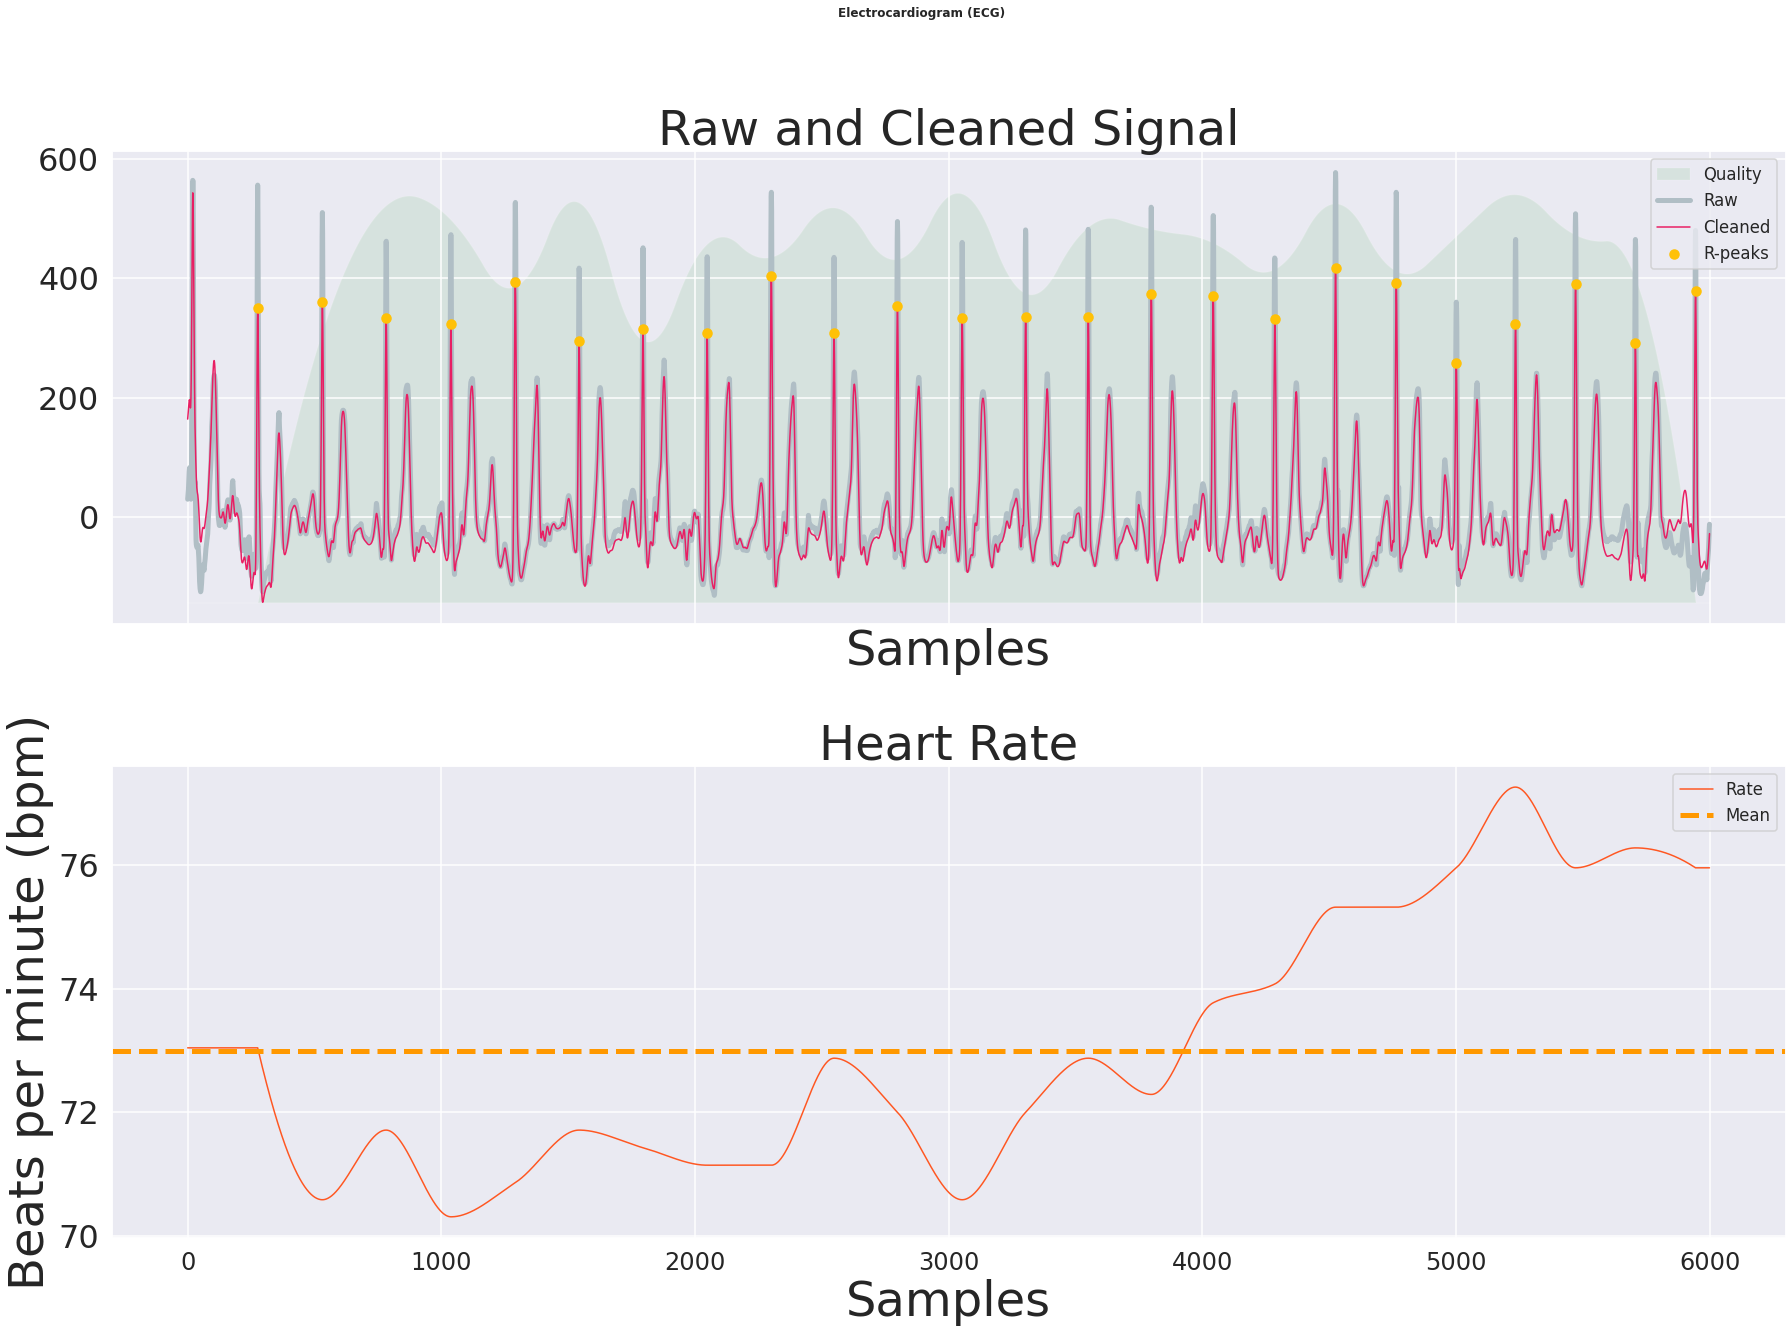

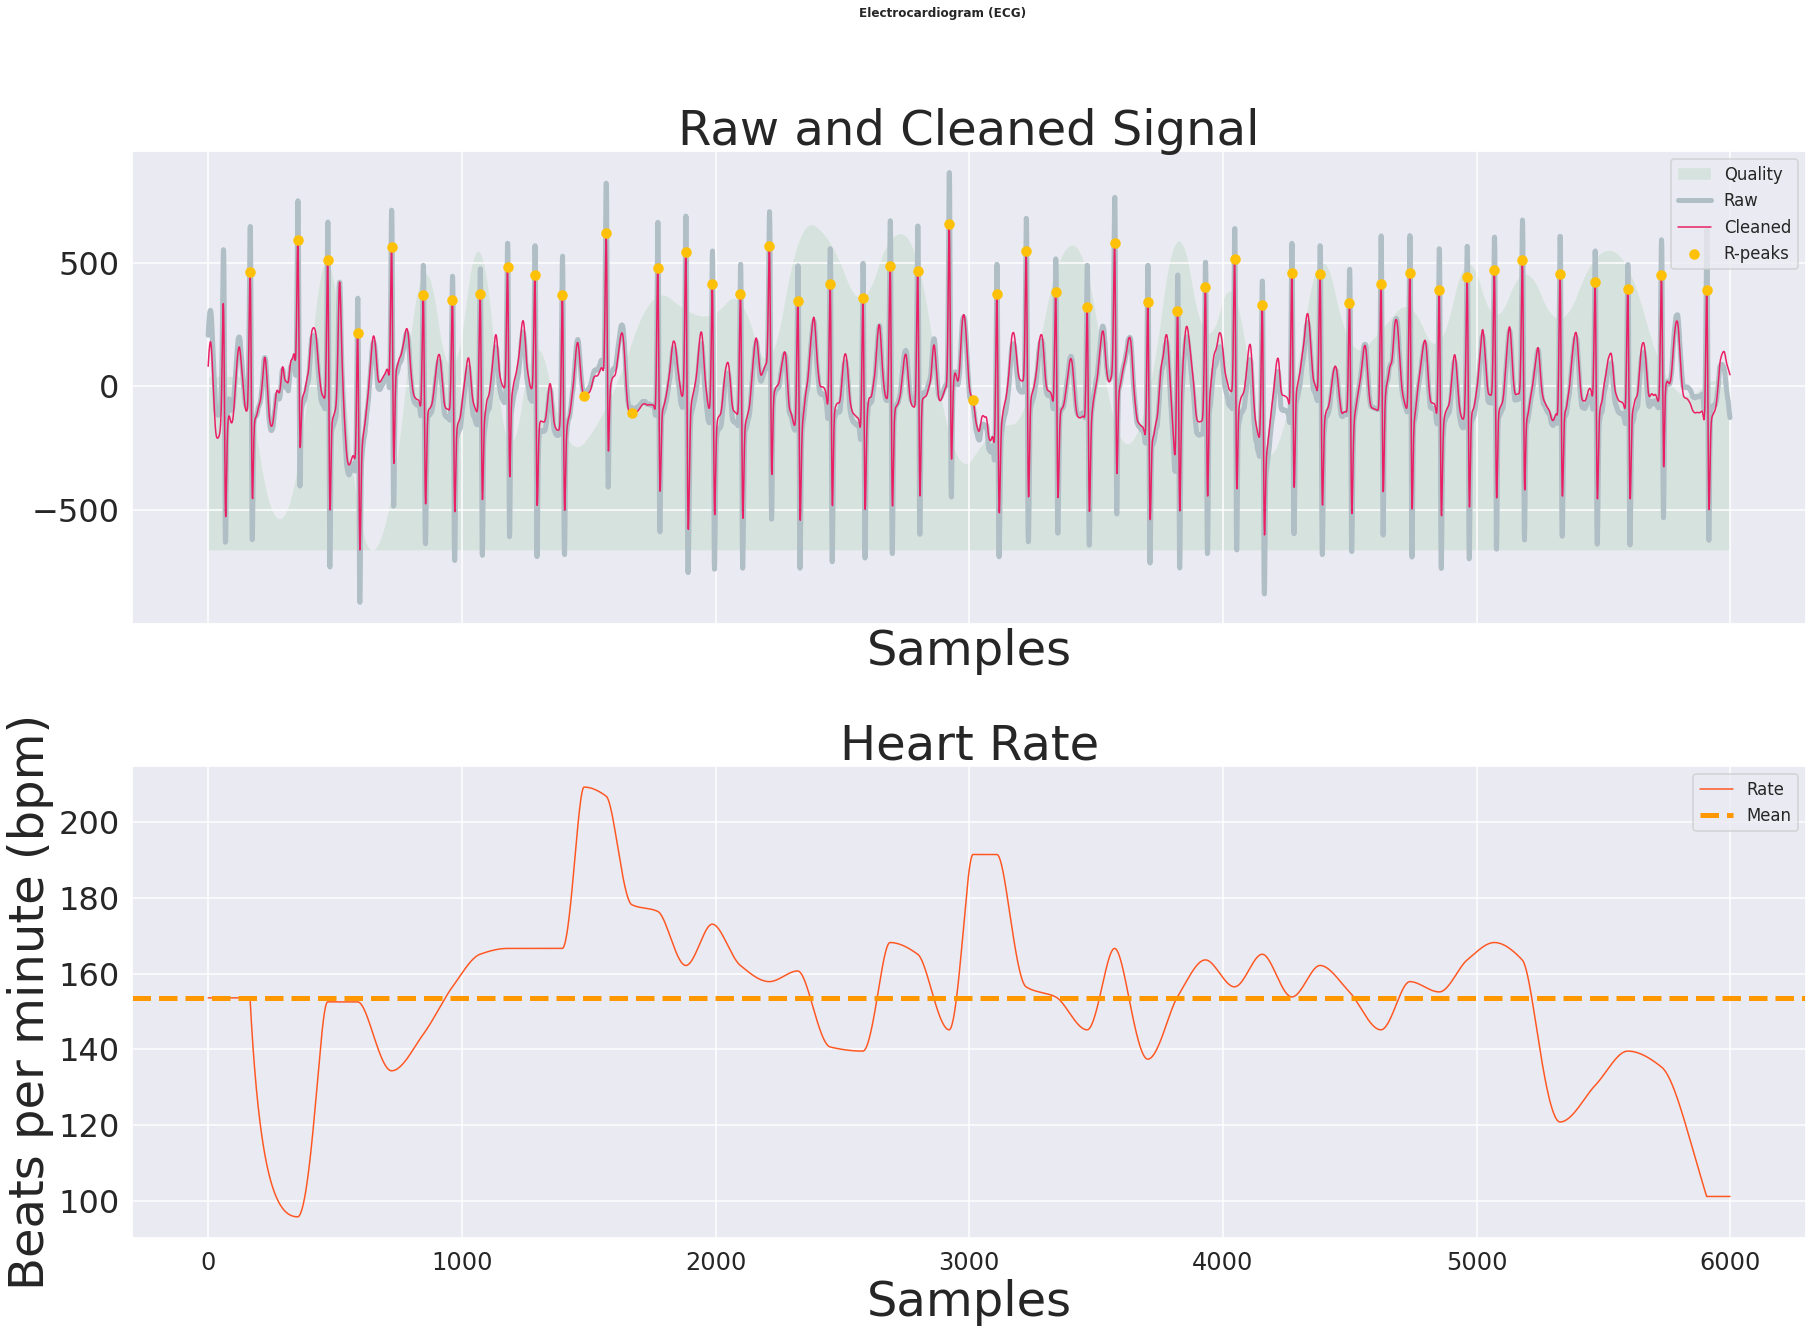

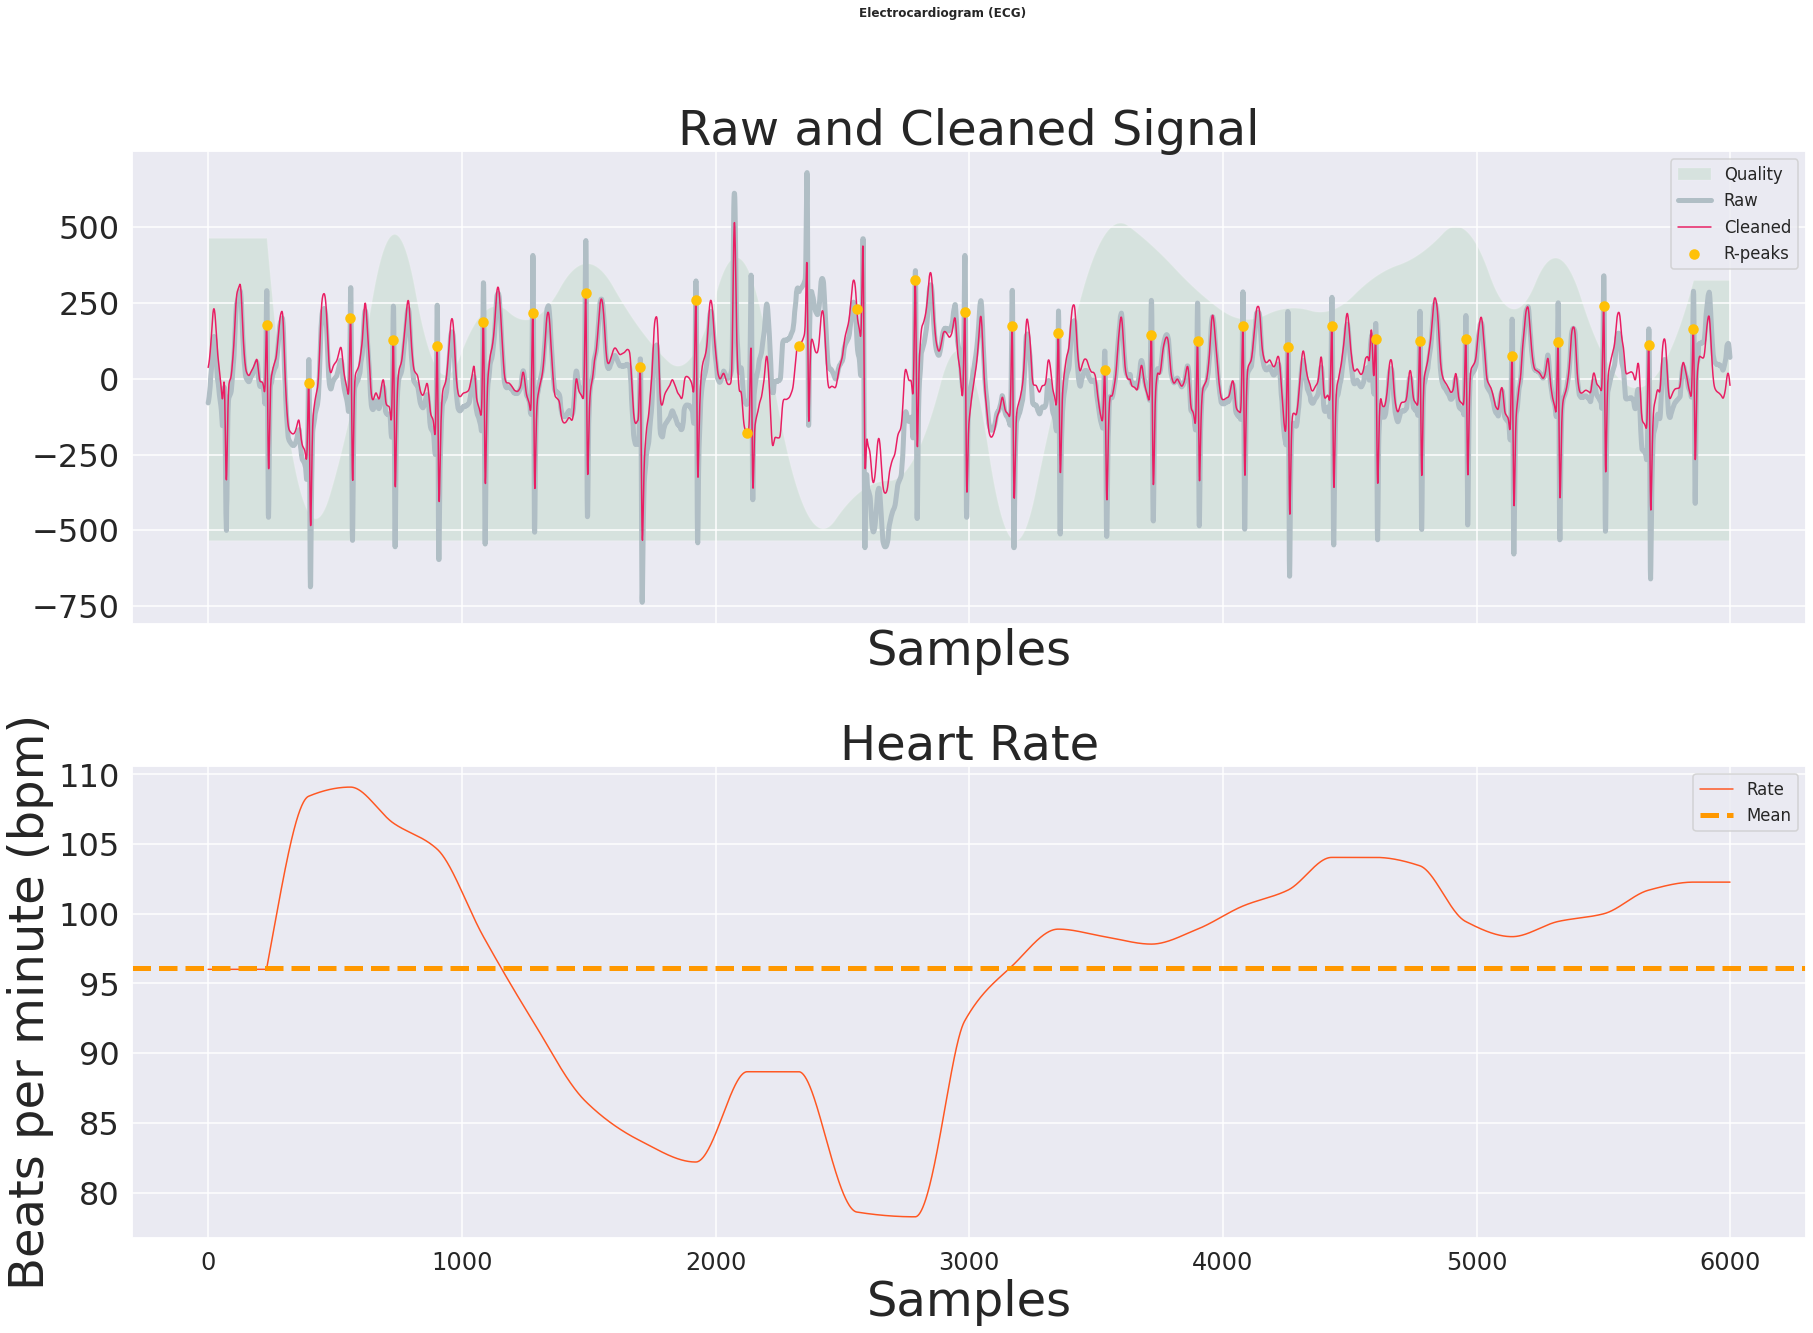

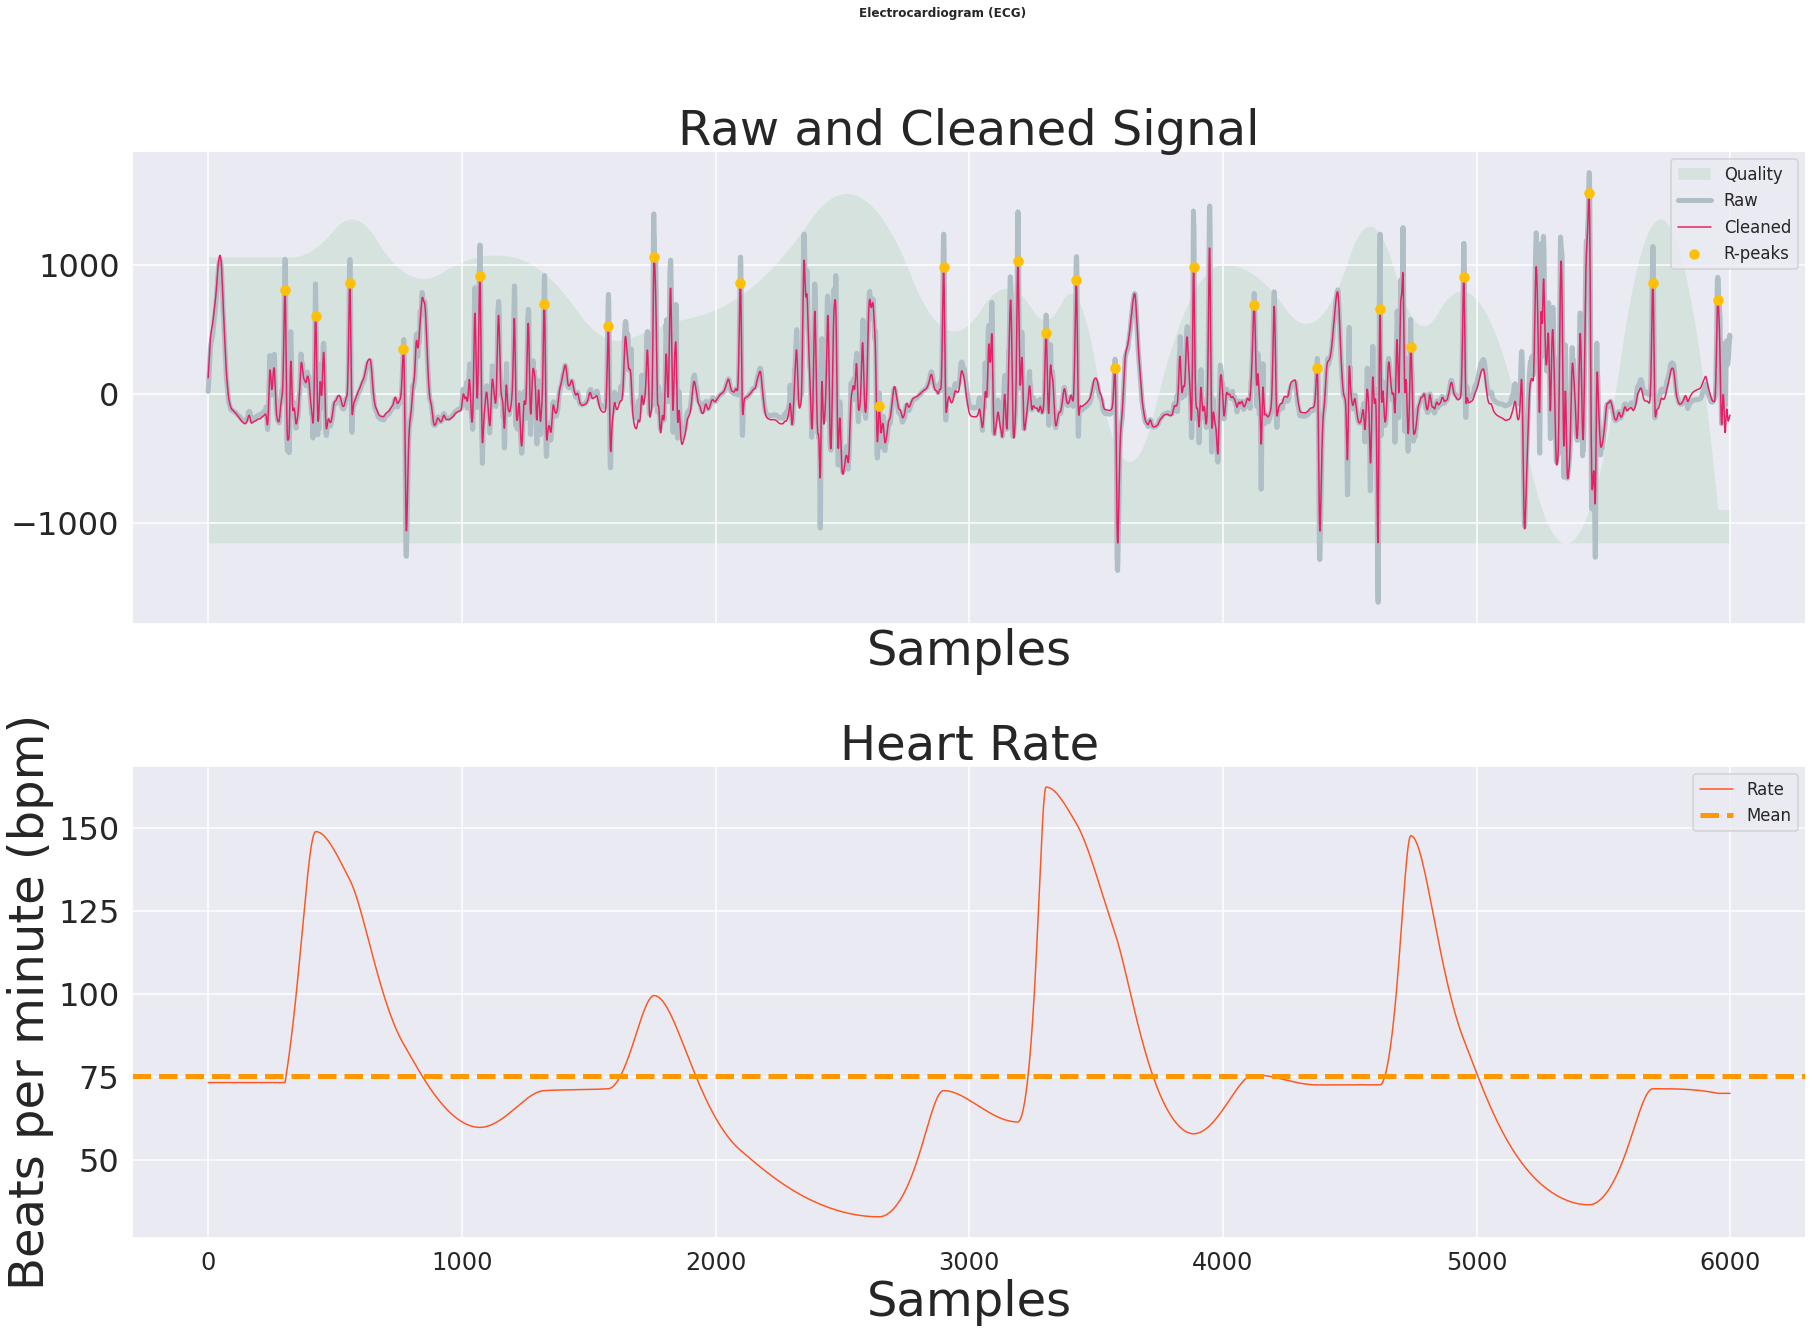

In [21]:
# Default processing pipeline
for class_id in range(num_classes):   
    signal = df_train.loc[sample_signal_ids[class_id]].dropna().to_numpy(dtype='float32')
    # Get a subsequence of a signal and downsample it for visualization purposes
    signal_cut = signal[1000:7000] 
    signals, info = nk.ecg_process(signal_cut, sampling_rate=sr)
    
    # Visualize
    plot = nk.ecg_plot(signals)

## Customised preprocessing
- By default Neurokit only takes into account different filtering methods during cleaning stage. There is no detrending (baseline correction) applied. Added below.
- Choose between different detrending and filter methods, details for param choice in
    - https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.signal.signal_detrend and
    - https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg.ecg_clean
- **Idea**: Only consider samples where "quality" is above a given threshold? 
    - No bad idea, quality close to 1 doesn't necessarily mean good. See Neurokit doc.
    - We should rather add it as a feature
- **Question**: How to find best cleaning method?

In [26]:
## Define customised cleaning function

def my_cleaning(raw_ecg, sampling_rate, detrend_method, filter_method):
    """
    For detrending: https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.signal.signal_detrend
    For filtering: https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg.ecg_clean
    """
    if detrend_method == 'constant':
        detrended = nk.signal_detrend(raw_ecg, order=0)
    elif detrend_method == 'linear':
        detrended = nk.signal_detrend(raw_ecg, order=1)
    elif detrend_method == 'quadratic':
        detrended = nk.signal_detrend(raw_ecg, order=2) 
    elif detrend_method == 'cubic':
        detrended = nk.signal_detrend(raw_ecg, order=3)
    elif detrend_method == 'poly10':
        detrended = nk.signal_detrend(raw_ecg, order=10)
    elif detrend_method == 'trav':
        detrended = nk.signal_detrend(raw_ecg, method='tarvainen2002')       
    elif detrend_method == 'loess':
        detrended = nk.signal_detrend(raw_ecg, method='loess')
    elif detrend_method == 'locreg':
        detrended = nk.signal_detrend(raw_ecg, method='locreg',
                                   window=1.5*100, stepsize=0.02*100)
    if filter_method == 'custom_butterworth':
        cleaned = nk.signal_filter(detrended, sampling_rate=sampling_rate, lowcut=2, highcut=9, method='butterworth')
    elif filter_method == 'custom_median': # from paper
        # TODO 
        pass
    else:
        cleaned = nk.ecg_clean(detrended, sampling_rate=sampling_rate, method=filter_method) # cleaning only applies filtering, no detrending
    
    # plot signals
    #plot = nk.signal_plot([raw_ecg, detrended, cleaned])

    return cleaned

# Define a new processing function
def my_processing(ecg_signal, sampling_rate, detrend_method='locreg', \
                  filter_method='neurokit'):
    """
    For detrending: https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.signal.signal_detrend
    For filtering: https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg.ecg_clean
    For quality method: https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg.ecg_quality
    
    TODO add quality method
    """
    
    # Do processing
    ecg_cleaned = my_cleaning(ecg_signal, sampling_rate=sampling_rate, detrend_method=detrend_method, \
                              filter_method=filter_method)
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)
    rate = nk.ecg_rate(rpeaks, sampling_rate=sampling_rate, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=sampling_rate)

    # Prepare output
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})

    signals = pd.concat([signals, instant_peaks], axis=1)
    info = rpeaks
    
    return signals, info

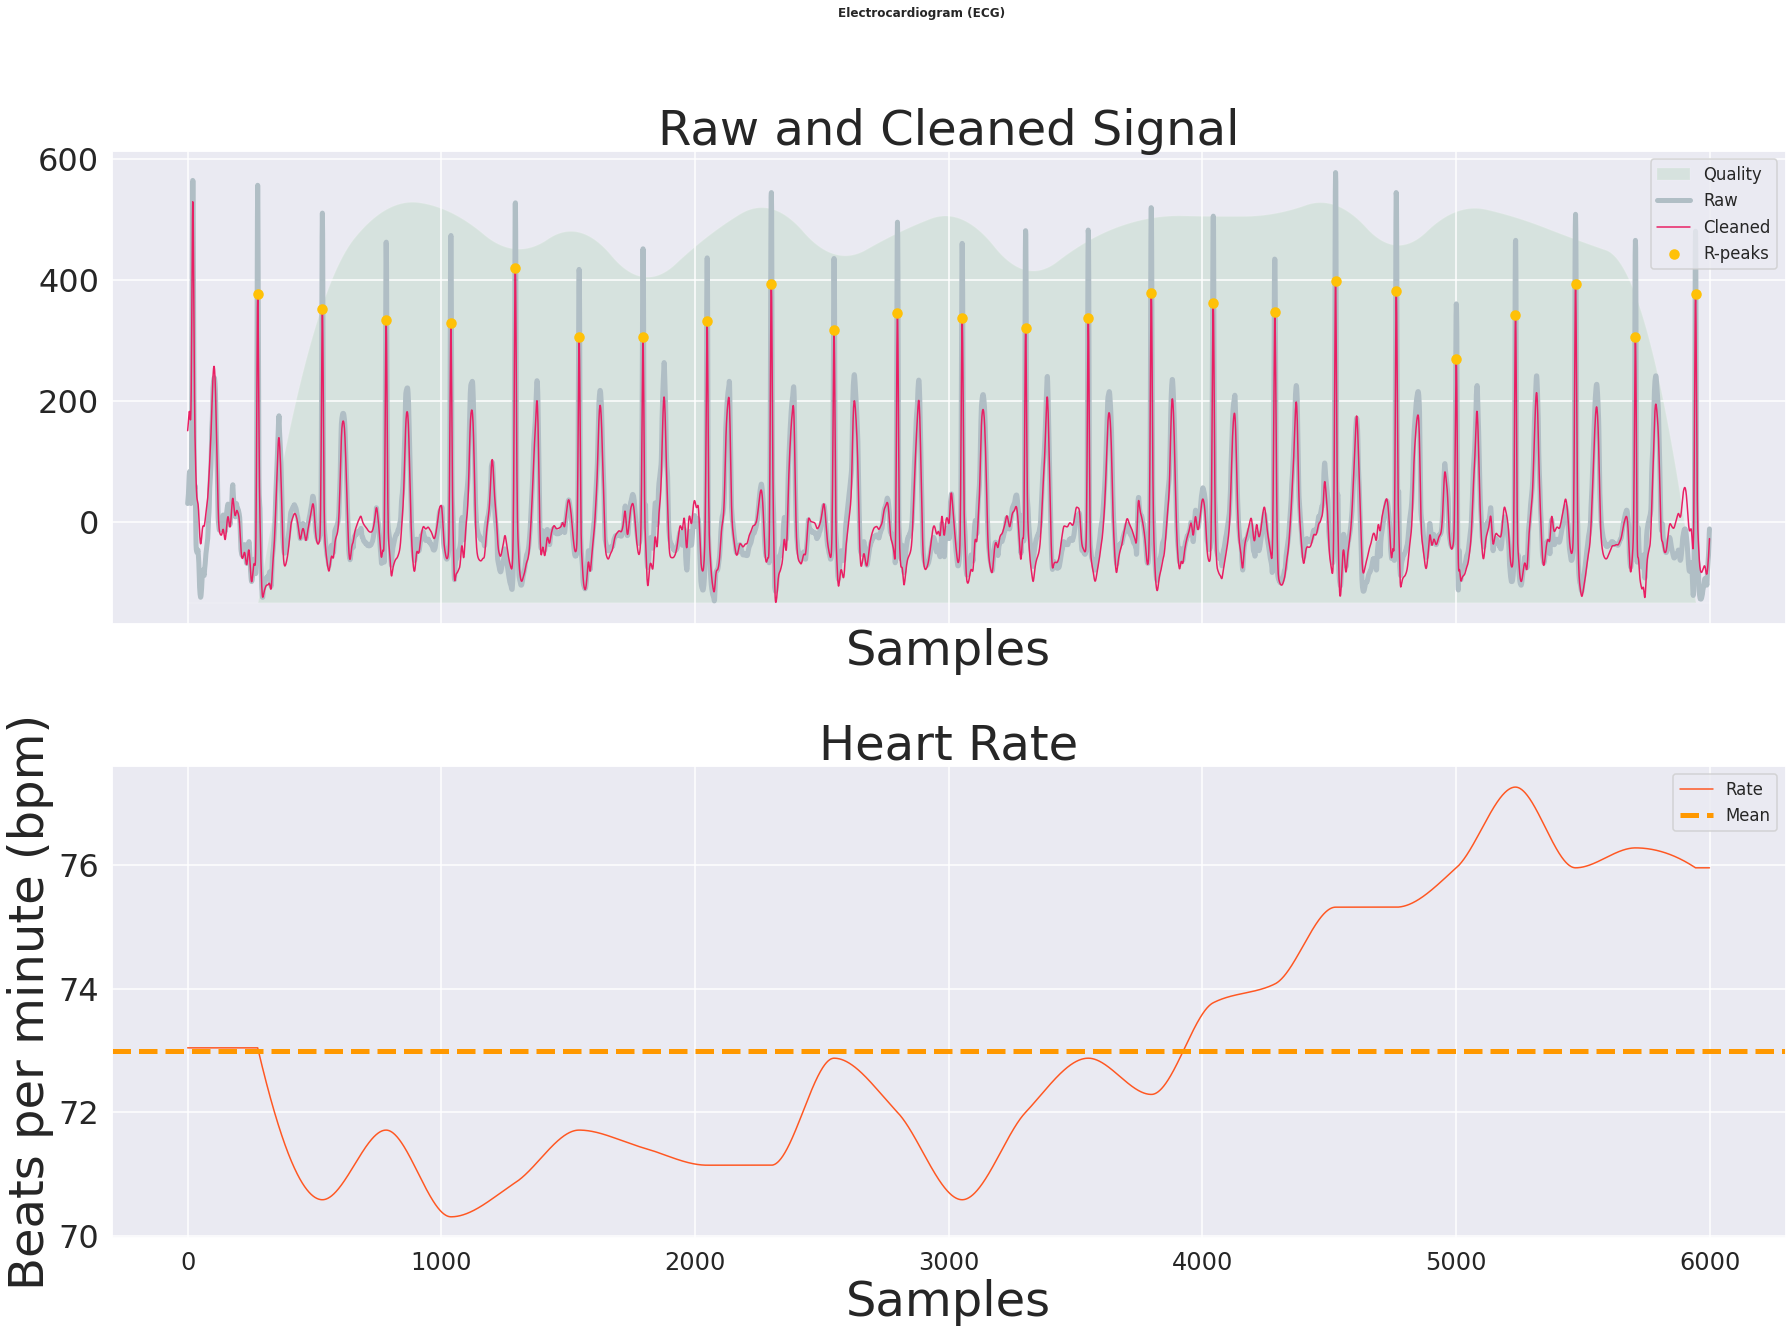

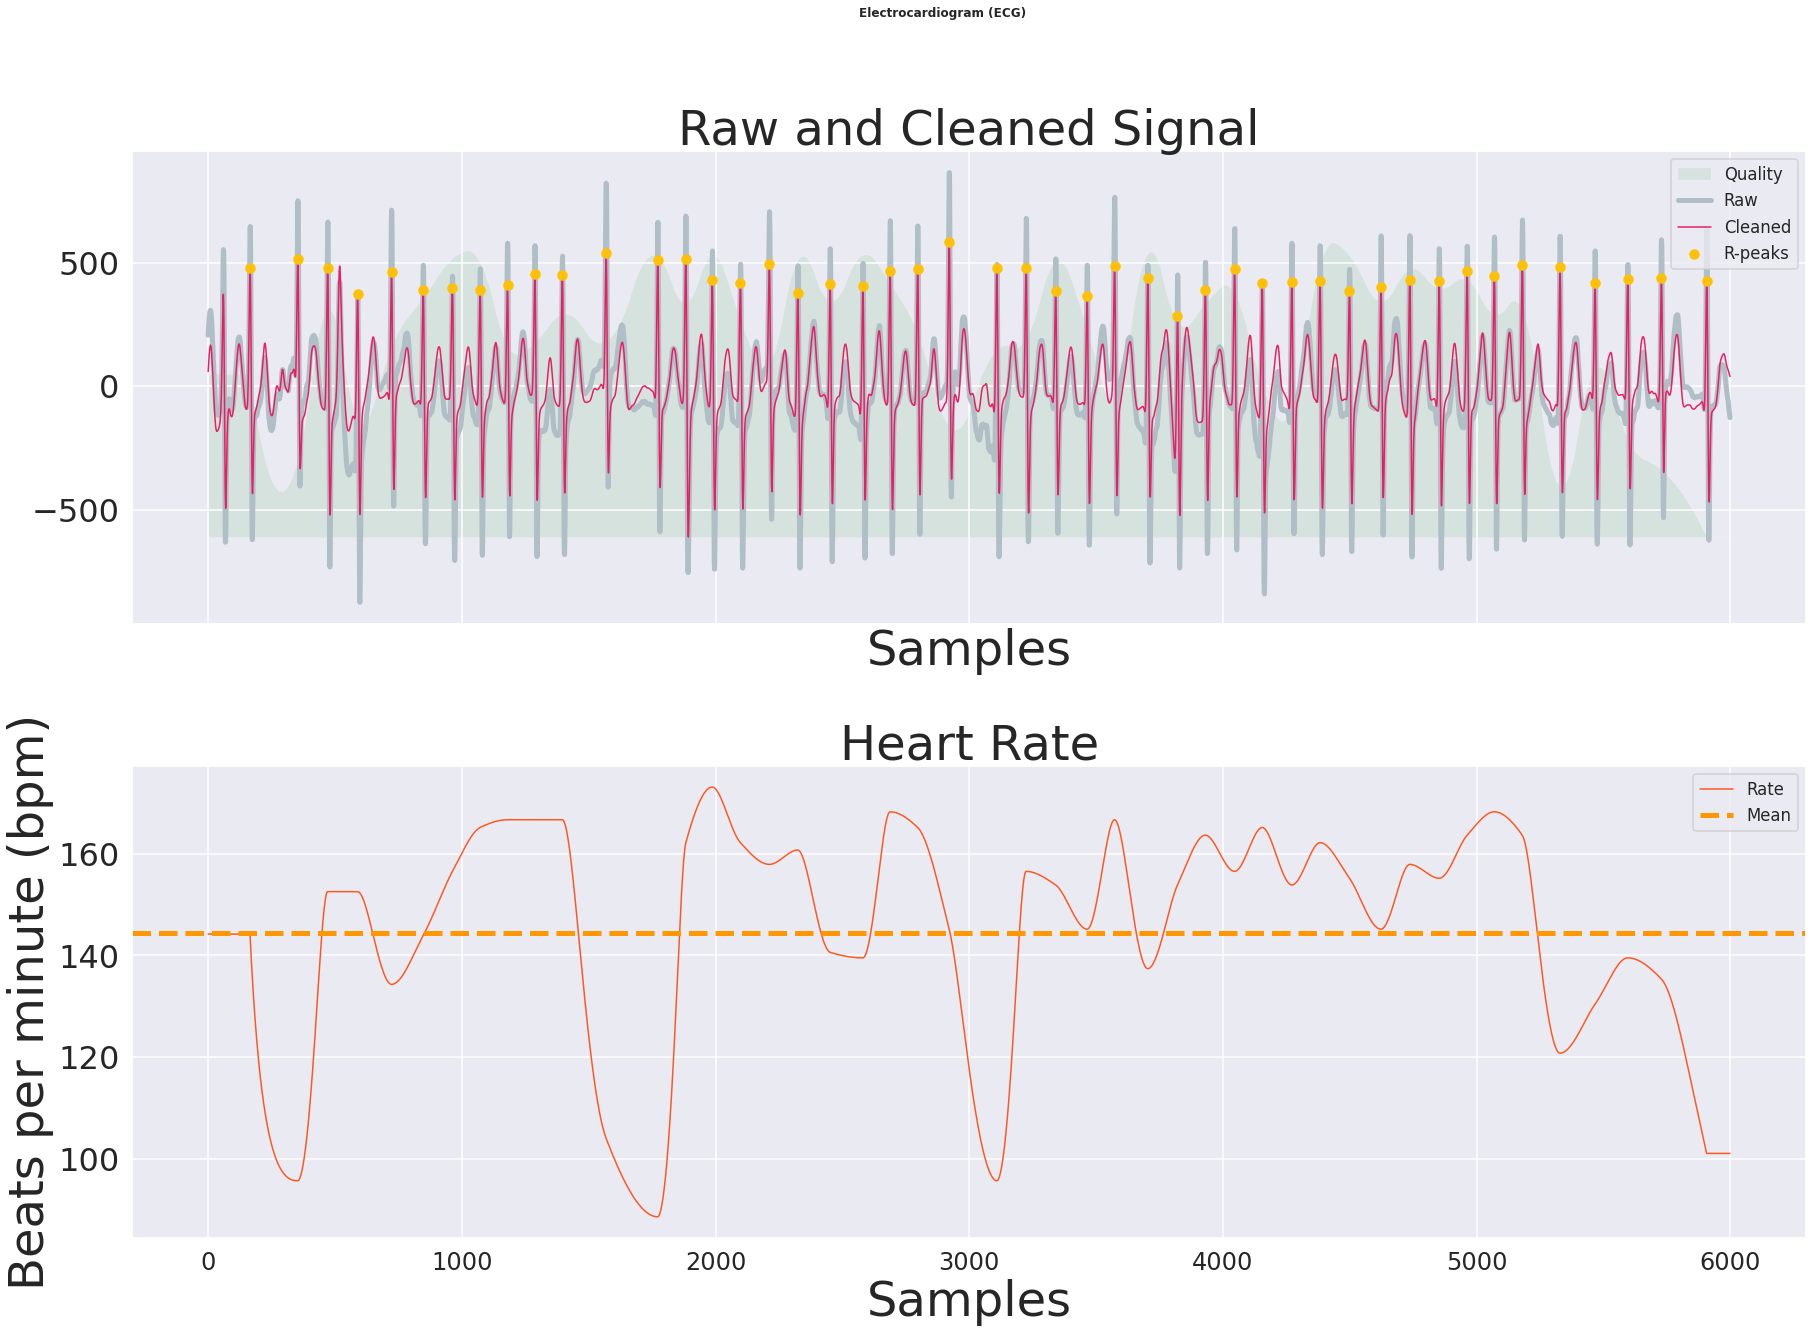

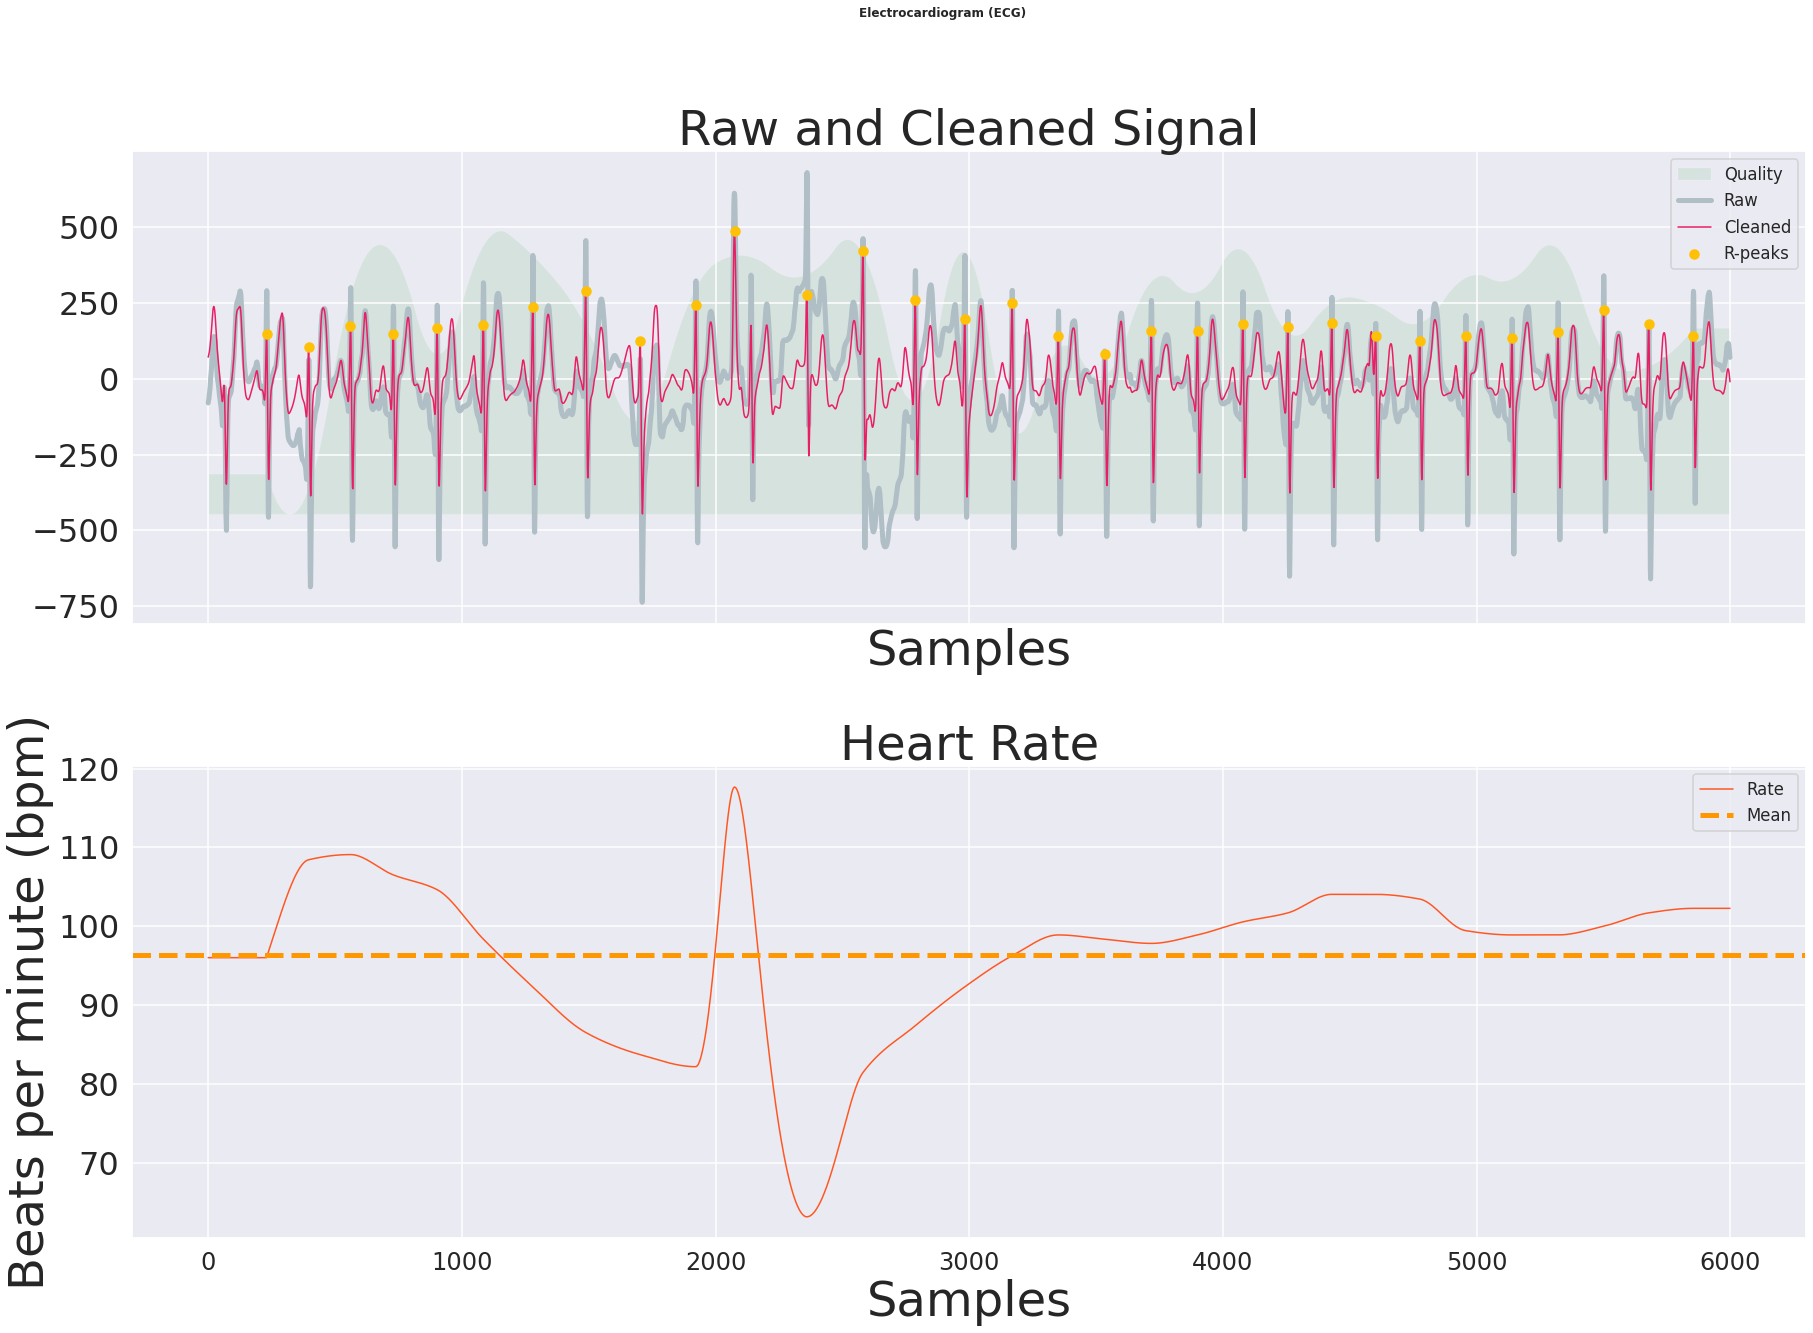

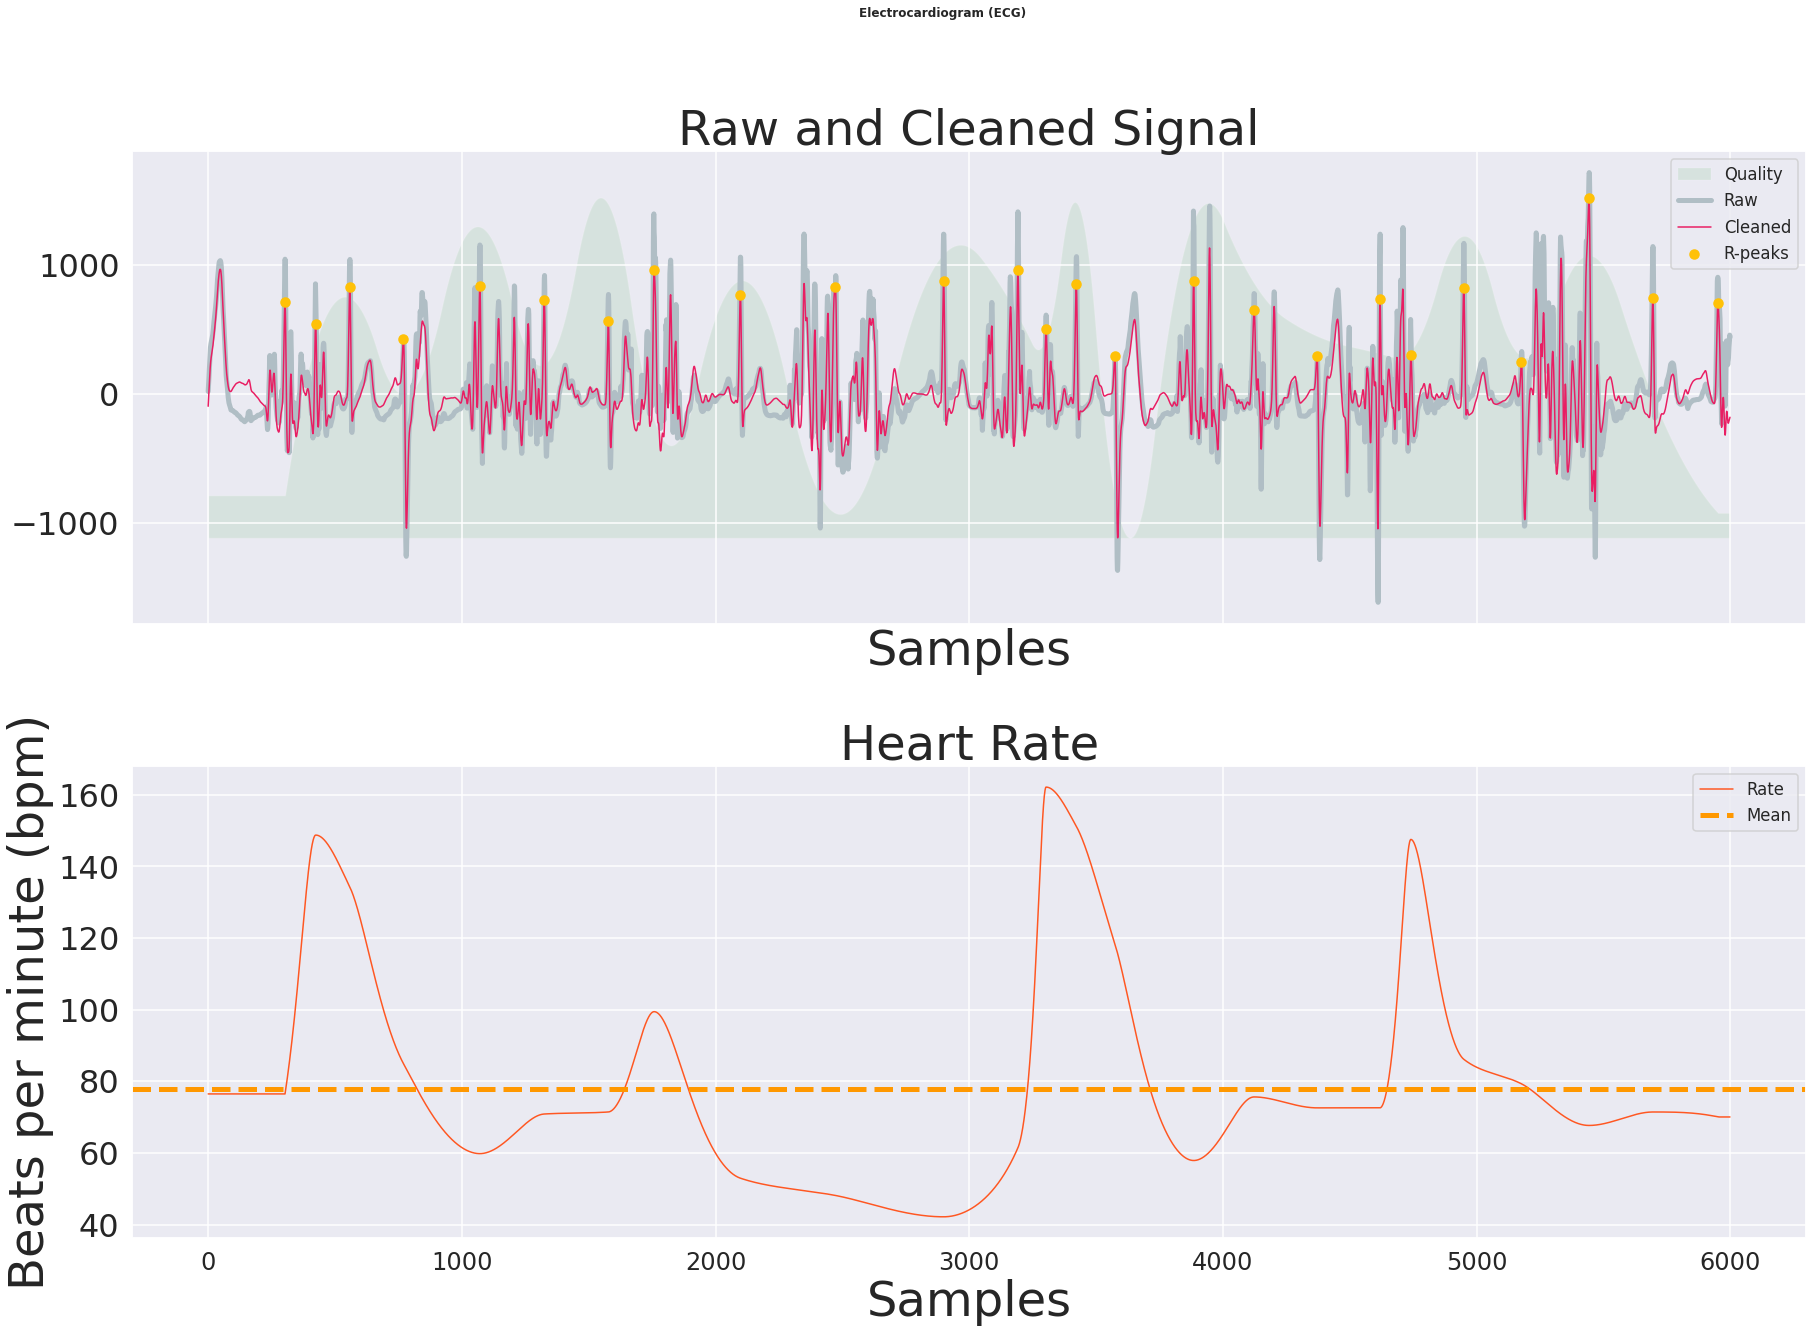

In [27]:
# Repeat for customised preprocessing pipeline
for class_id in range(num_classes):   
    signal = df_train.loc[sample_signal_ids[class_id]].dropna().to_numpy(dtype='float32')
    # Get a subsequence of a signal and downsample it for visualization purposes
    signal_cut = signal[1000:7000] 
    signals, info = my_processing(signal_cut, sampling_rate=sr, detrend_method='locreg', \
                                  filter_method='neurokit')
    
    # Visualize
    plot = nk.ecg_plot(signals)

---

# Experiment section

## Extract features for one sample

1) extract mean beat
2) extract std beat
3) extract median beat
4) avg RR, std RR
5) avg quality ,std quality
6) avg rate, std rate, min and max
7) avg R amplitude and std
8) avg Q amplitude and std


Process a raw ECG signal and extract relevant signal features using default parameters.

In [37]:
plt.rcdefaults() 

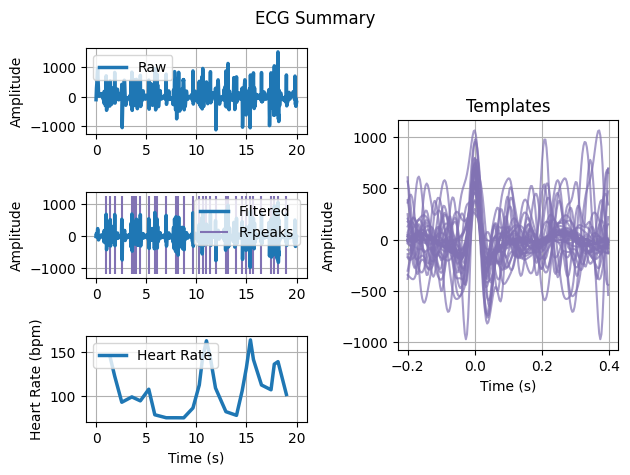

In [40]:
signal_features = ecg.ecg(signal=signal_clean, sampling_rate=sr, show=True)

In [61]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks
0,20.0,-95.146716,76.473712,0.056507,0
1,51.0,-56.970865,76.473712,0.056507,0
2,86.0,-18.357354,76.473712,0.056507,0
3,125.0,20.874136,76.473712,0.056507,0
4,167.0,60.520627,76.473712,0.056507,0
...,...,...,...,...,...
5995,362.0,-207.253666,70.038911,0.000000,0
5996,389.0,-197.743105,70.038911,0.000000,0
5997,413.0,-189.919530,70.038911,0.000000,0
5998,456.0,-183.836004,70.038911,0.000000,0


In [62]:
# Find peaks
peaks, info = nk.ecg_peaks(signals["ECG_Clean"], sampling_rate=sr)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN
0,784.583333,277.415283,NaN,NaN,NaN,NaN,NaN,NaN,277.260581,282.774695,0.353583,0.353386,826.666667,242.158,0.292933,330.0,66.666667,83.333333,12.0,453.125


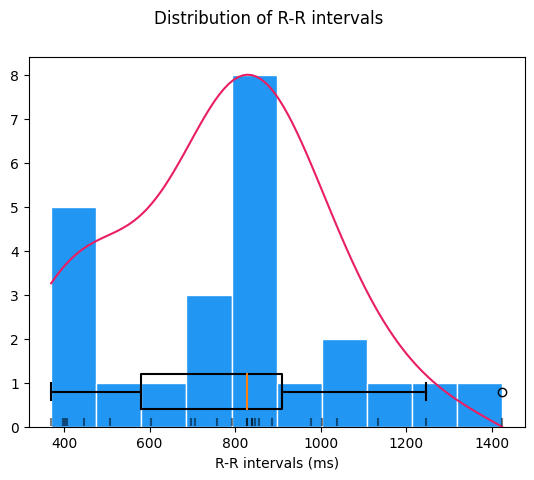

In [63]:
# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(peaks, sampling_rate=sr, show=True)
hrv_time

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.08682,0.011273,NaN,NaN,0.885078,-2.443923


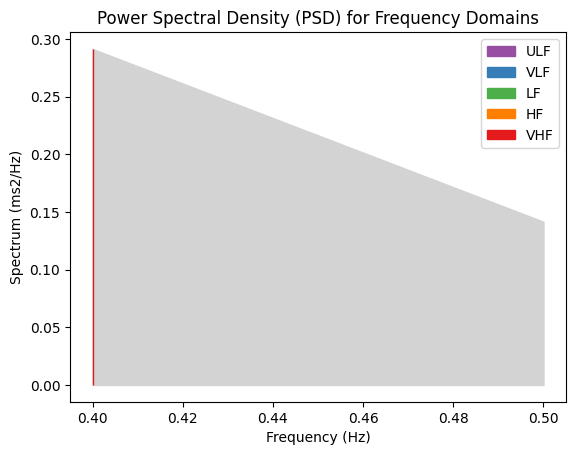

In [64]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=sr, show=True, normalize=True)
hrv_freq

/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/hrv/hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/complexity/entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/complexity/optim_complexity_k.py:83: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. We will return optimal k_max = 12 (the max).
  warn(
/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/hrv/hrv_nonlinear.py:612: UserWarni

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_DFA_alpha1,HRV_DFA_alpha1_ExpRange,HRV_DFA_alpha1_ExpMean,HRV_DFA_alpha1_DimRange,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,199.951905,337.332792,0.592744,211901.47441,1.68707,6.033104,2276.415673,0.458333,0.5,0.545455,0.166667,54.74198,56.511821,53.385134,36.363636,0.498925,0.501075,141.593564,141.898207,0.793891,0.206109,300.565366,153.146573,0.716913,0.283087,234.934328,147.62956,1.079852,2.255365,1.626366,1.529125,0.075076,0.38162,1.94591,4.418296,1.682008,NaN,NaN,NaN,0.876555,1.90765,1.970947,1.337281


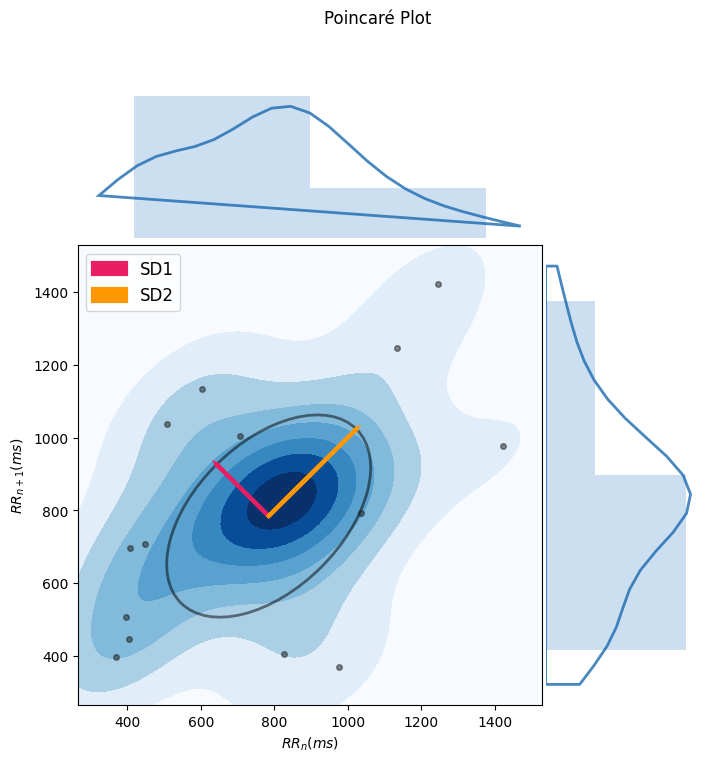

In [65]:
hrv_non = nk.hrv_nonlinear(peaks, sampling_rate=sr, show=True)
hrv_non

/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/hrv/hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/complexity/entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/complexity/optim_complexity_k.py:83: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. We will return optimal k_max = 12 (the max).
  warn(
/home/rapwag01/.virtualenvs/vethaml/lib/python3.8/site-packages/neurokit2/hrv/hrv_nonlinear.py:612: UserWarni

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_DFA_alpha1,HRV_DFA_alpha1_ExpRange,HRV_DFA_alpha1_ExpMean,HRV_DFA_alpha1_DimRange,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,784.583333,277.415283,NaN,NaN,NaN,NaN,NaN,NaN,277.260581,282.774695,0.353583,0.353386,826.666667,242.158,0.292933,330.0,66.666667,83.333333,12.0,453.125,NaN,NaN,NaN,0.08682,0.011273,NaN,NaN,0.885078,-2.443923,199.951905,337.332792,0.592744,211901.47441,1.68707,6.033104,2276.415673,0.458333,0.5,0.545455,0.166667,54.74198,56.511821,53.385134,36.363636,0.498925,0.501075,141.593564,141.898207,0.793891,0.206109,300.565366,153.146573,0.716913,0.283087,234.934328,147.62956,1.079852,2.255365,1.626366,1.529125,0.075076,0.38162,1.94591,4.418296,1.682008,NaN,NaN,NaN,0.876555,1.90765,1.970947,1.337281


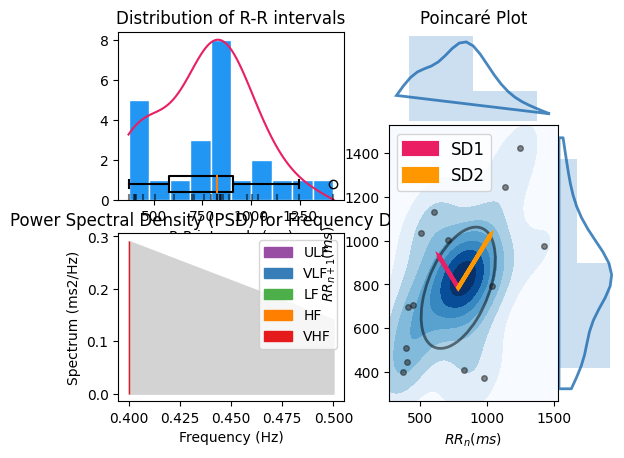

In [66]:
hrv_indices = nk.hrv(peaks, sampling_rate=sr, show=True)
hrv_indices

---

## Try to delineate (define PQR peaks)
- No good, even if default and customised cleaning applied before
- Check sample 30 (class 3) -> chaotic


In [51]:
signal

array([  30., -456., -515., ...,  160.,  145.,  127.], dtype=float32)

In [56]:
# apply cleaning
signal_cleaned = nk.ecg_clean(signal, sampling_rate=sr)

In [57]:
_, rpeaks = nk.ecg_peaks(signal_cleaned, sampling_rate=sr)

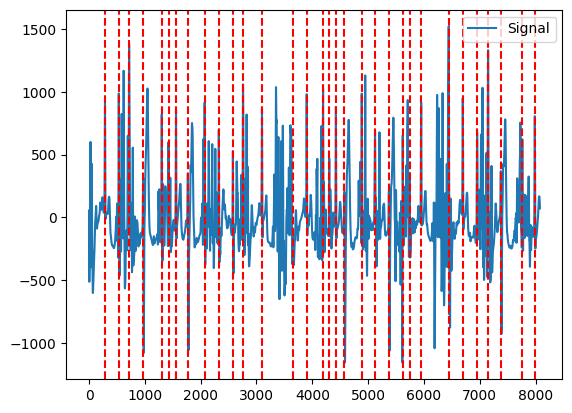

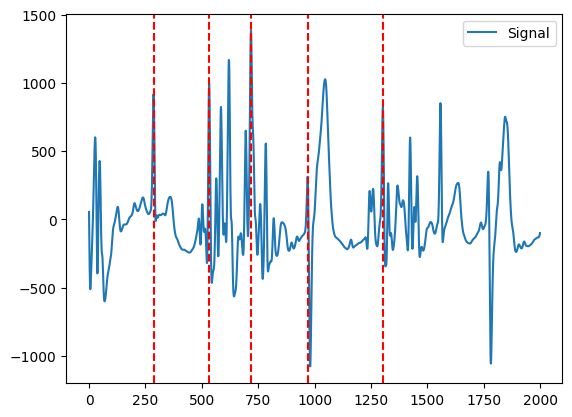

In [58]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signal_cleaned)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], signal_cleaned[:2000])

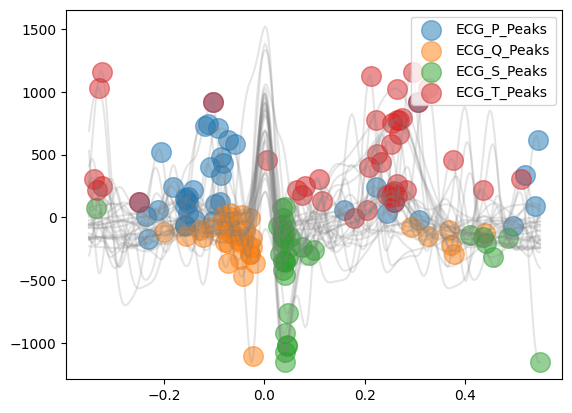

In [59]:
_, waves_peak = nk.ecg_delineate(signal_cleaned, rpeaks, sampling_rate=sr, method="peak", show=True, show_type='peaks')

In [60]:
waves_peak

{'ECG_P_Peaks': [240,
  503,
  696,
  899,
  1260,
  1369,
  1516,
  1739,
  2053,
  2263,
  2506,
  2732,
  3052,
  3609,
  3851,
  4164,
  4239,
  4376,
  4499,
  4860,
  5075,
  nan,
  5592,
  5710,
  5902,
  6410,
  6648,
  6904,
  7122,
  nan,
  7727,
  7909],
 'ECG_Q_Peaks': [265,
  524,
  706,
  932,
  1279,
  1414,
  1534,
  1748,
  2062,
  2311,
  2559,
  2742,
  3073,
  3639,
  3878,
  4177,
  4289,
  4390,
  4553,
  4877,
  5084,
  5324,
  5612,
  5732,
  5928,
  6421,
  6681,
  6930,
  7135,
  7316,
  7753,
  7962],
 'ECG_S_Peaks': [297,
  545,
  747,
  981,
  1315,
  1435,
  1569,
  1783,
  2083,
  2336,
  2588,
  2784,
  3109,
  3654,
  3911,
  4202,
  4314,
  4433,
  4586,
  4907,
  5135,
  5384,
  5627,
  5755,
  5960,
  6457,
  6706,
  6967,
  7160,
  7388,
  7776,
  7997],
 'ECG_T_Peaks': [361,
  621,
  785,
  1048,
  1327,
  1456,
  1637,
  1846,
  2146,
  2409,
  2646,
  2824,
  3177,
  3706,
  3972,
  4304,
  4322,
  4499,
  4653,
  4948,
  5203,
  5453,
  5710,
  